In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from filters import Kalman, Kalman_Ensemble, Naive, Bootstrap_PT
from process import gen_process

import pandas as pd

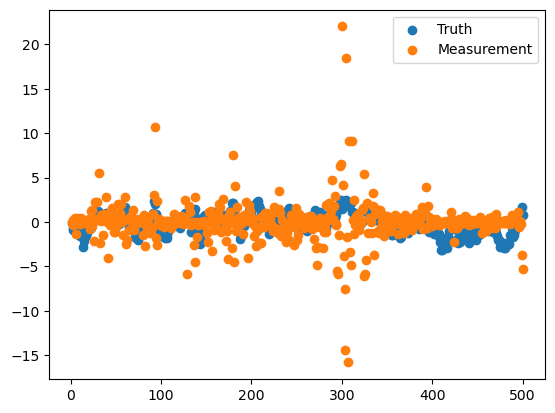

In [2]:
iters, u, y = gen_process(n = 500, linear = False)

plt.scatter(iters, u, label = "Truth")
plt.scatter(iters, y, label = "Measurement")
plt.legend()

In [3]:
data = pd.read_csv('synthetic_data.csv')
y_measurements = data['y'].to_numpy()

In [ ]:
bootstrap = Bootstrap_PT(n = 10, linear = False)
Kalman_ensemble_filter = Kalman_Ensemble(n = 10, linear = False)

for i in range(len(iters)):

    Kalman_ensemble_filter.iterate(y_measurements[i])
    bootstrap.iterate(y_measurements[i])

fig, axes = plt.subplots(2,2, figsize = (15,7))

axes[0][0].scatter(iters, u, label = "Truth")
axes[0][1].scatter(iters, u, label = "Truth")

axes[0][0].scatter(iters, Kalman_ensemble_filter.u_est_hist, label = "Kalman")
axes[0][1].scatter(iters, bootstrap.u_est_hist, label = "Bootstrap", color = 'red')

axes[0][0].legend()
axes[0][1].legend()

axes[1][0].scatter(iters[1:], bootstrap.ESS_hist)